In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
from coaddData import *

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
font = 15
mpl.rc('text', usetex=True)
mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
mpl.rc('font', family = 'serif', size = font)

mpl.rcParams['font.size'] = 15
mpl.rcParams['legend.fontsize'] = 'medium'
mpl.rcParams['figure.titlesize'] = 'large'
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'

In [2]:
wavebin_a = [0.08, 0.5, 1, 2, 10] # Width of wavelength bins for final histograms
wave_bins = [ np.arange(1000,2400,wavebin) for wavebin in wavebin_a ] # wavelength bins
wave_cen = [ (wb[1:] + wb[:-1])/2. for wb in wave_bins] # center of wavelength bins

In [3]:
# Load in data
prefix = './data/nucleus/'
exp_pre = [ "ldhv01k1q_", "ldhv01k3q_", "ldhv01k5q_", "ldhv01k7q_" ]
exp_pre.extend([ "ldhv02xvq_", "ldhv02xzq_", "ldhv02y1q_", "ldhv02y3q_" ])
for i in range(len(exp_pre)): exp_pre[i] = prefix+exp_pre[i]

# Variables we are interested in
keys = ['FLUX', 'WAVELENGTH', 'DQ', 'ERROR', 'GROSS', 'NET', 'BACKGROUND', 'GCOUNTS', 'BACKGROUND_PER_PIXEL', 'EXPTIME', 'NETCOUNTS'] 

In [4]:
# Get data with DQ cuts, binned in new wavelength bins, and coadded
binned_data, comb_data = [], []
for iw in range(len(wavebin_a)):
    exp_hdul, _, DQ_data_t, binned_data_t, comb_data_t = coaddData(exp_pre, keys, wave_bins[iw])
    DQ_data = DQ_data_t
    binned_data.append(binned_data_t)
    comb_data.append(comb_data_t)

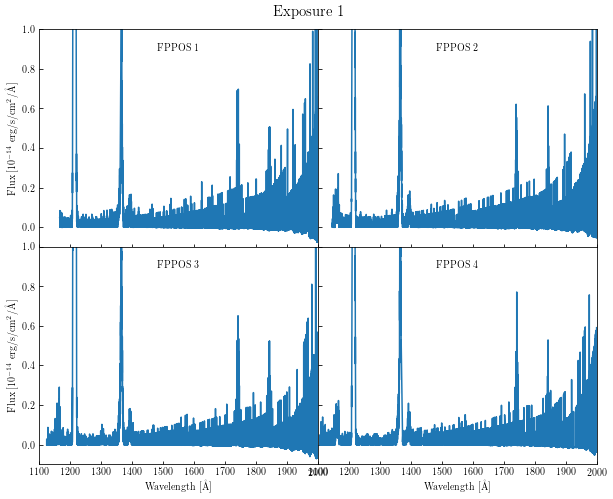

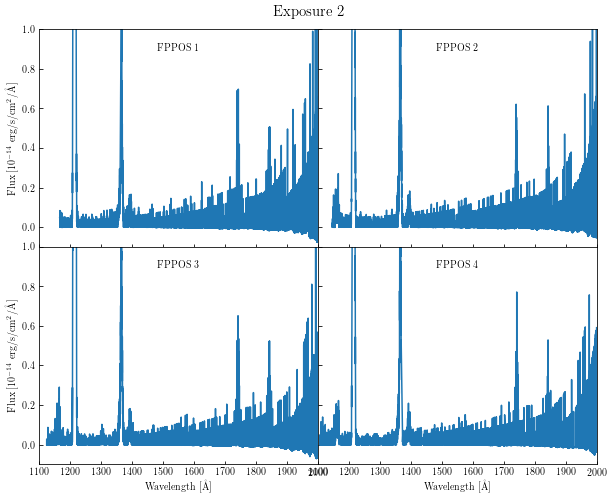

In [5]:
# Plots of flux for 4 FP-POS positions, DQ cuts
for j in [1,2]:
    fig, ax = plt.subplots(2,2,figsize=(10,8), sharex=True, sharey=True)
    for i in range(len(exp_pre[4*(j-1):4*j])):
        ind1 = int(i>1)
        ind2 = int(i%2!=0)
        ax[ind1][ind2].plot(DQ_data[i]['WAVELENGTH'], DQ_data[i]['FLUX']*1e14, label="FP-POS "+str(exp_hdul[i][0].header['FPPOS']))
        ax[ind1][ind2].set_ylim(-0.1, 1)
        ax[ind1][ind2].set_xlim(1100,2000)
        ax[ind1][ind2].text(.5,.9,"FPPOS "+str(exp_hdul[i][0].header['FPPOS']),
        horizontalalignment='center',
        transform=ax[ind1][ind2].transAxes)
    ax[1][0].set_xlabel(r"Wavelength [$\textup{\AA}$]")
    ax[1][1].set_xlabel(r"Wavelength [$\textup{\AA}$]")
    ax[0][0].set_ylabel(r"Flux [$10^{-14}$ erg/s/cm$^2$/$\textup{\AA}$]")
    ax[1][0].set_ylabel(r"Flux [$10^{-14}$ erg/s/cm$^2$/$\textup{\AA}$]")
    plt.suptitle("Exposure "+str(j), y=0.92, fontsize=15)
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()

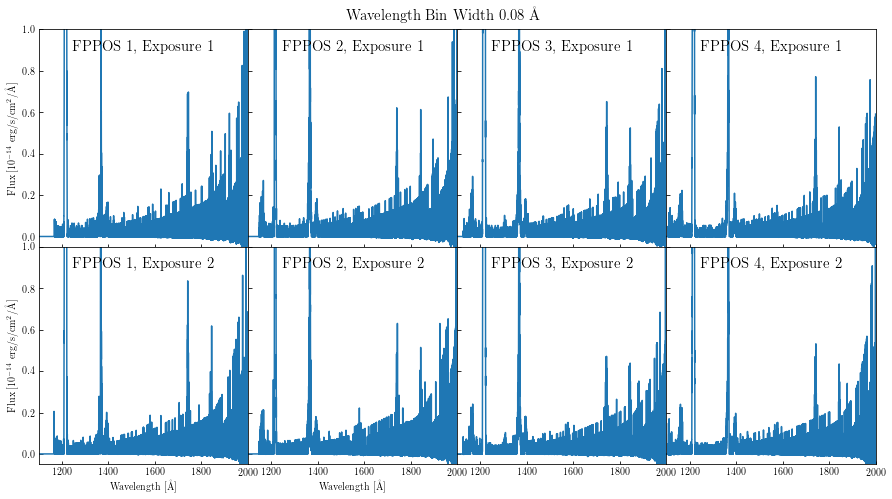

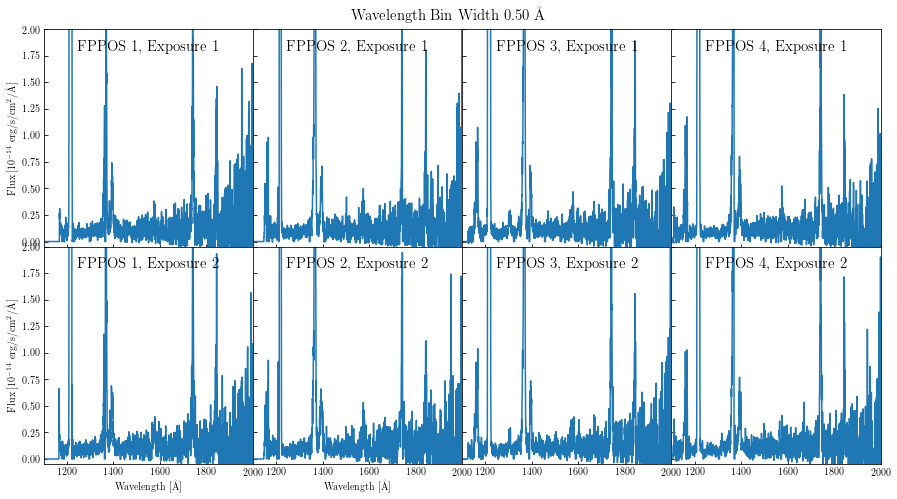

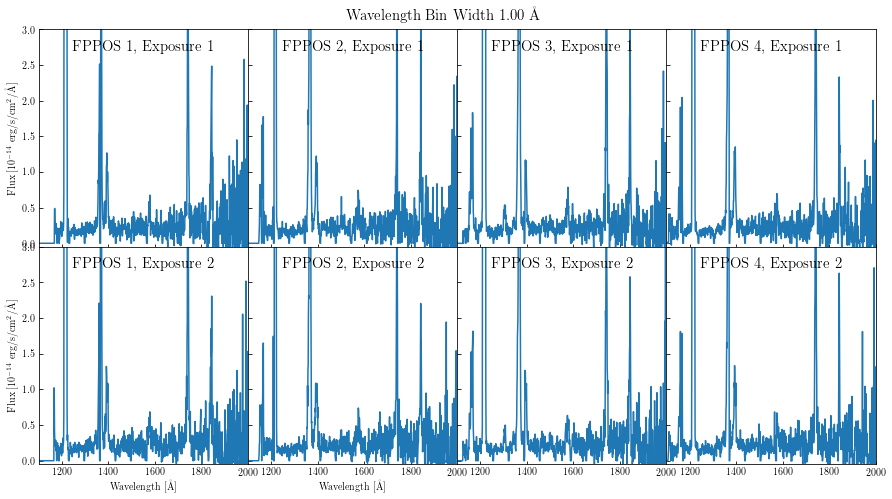

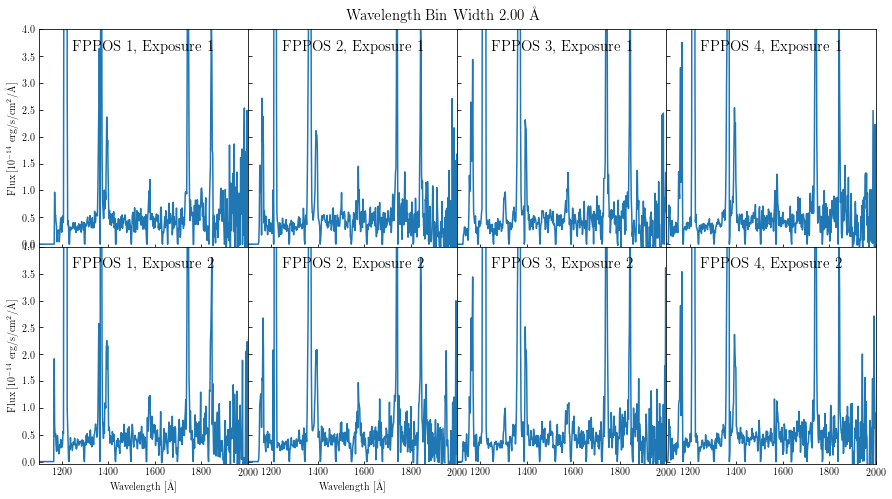

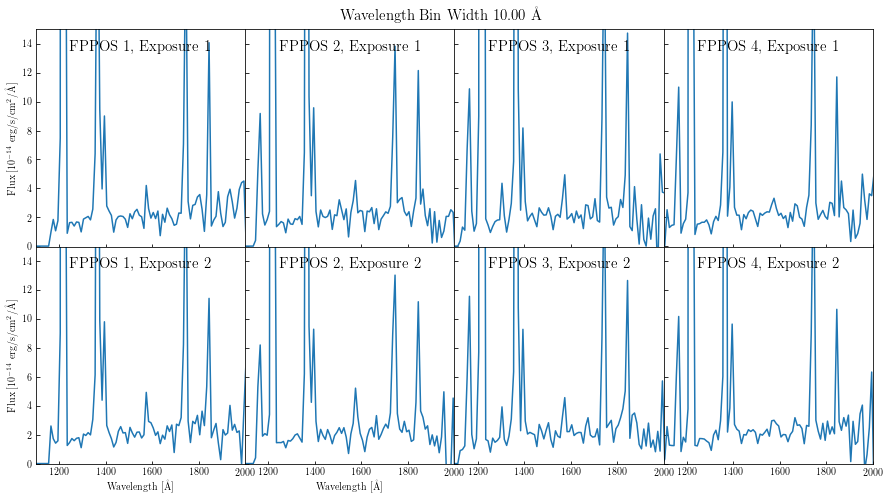

In [6]:
# Plots of flux for 4 FP-POS positions, DQ cuts and rebinning
ybounds = [(-0.05,1), (-0.05, 2), (-0.05, 3), (-0.05, 4), (-0.05, 15)]
for iw, wavebin in enumerate(wavebin_a):
    fig, ax = plt.subplots(2,4,figsize=(15,8), sharex=True, sharey=True)
    for i in range(len(exp_pre)):
        ind1 = int(i>3)
        ind2 = i%4
        ax[ind1][ind2].plot(wave_cen[iw], binned_data[iw][i]['FLUX']*1e14, label="FP-POS "+str(exp_hdul[i][0].header['FPPOS']))
        ax[ind1][ind2].set_ylim(ybounds[iw])
        ax[ind1][ind2].set_xlim(1100,2000)
        ax[ind1][ind2].text(.5,.9,"FPPOS "+str(exp_hdul[i][0].header['FPPOS'])+", Exposure "+str(ind1+1),
                            horizontalalignment='center',
                            fontsize=15,
                            transform=ax[ind1][ind2].transAxes)
    fig.suptitle(r"Wavelength Bin Width %1.2f $\textup{\AA}$"%wavebin, y=0.92, fontsize=15)
    ax[1][0].set_xlabel(r"Wavelength [$\textup{\AA}$]")
    ax[1][1].set_xlabel(r"Wavelength [$\textup{\AA}$]")
    ax[0][0].set_ylabel(r"Flux [$10^{-14}$ erg/s/cm$^2$/$\textup{\AA}$]")
    ax[1][0].set_ylabel(r"Flux [$10^{-14}$ erg/s/cm$^2$/$\textup{\AA}$]")
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()

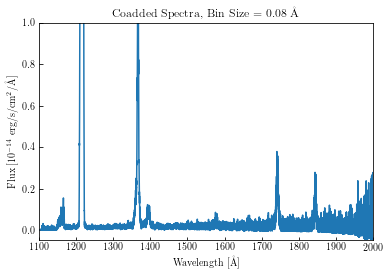

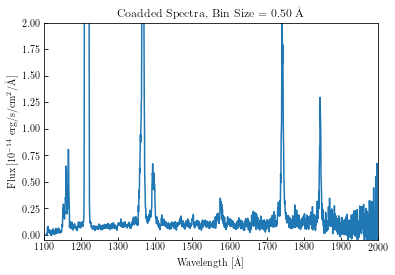

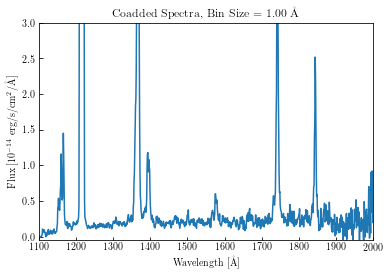

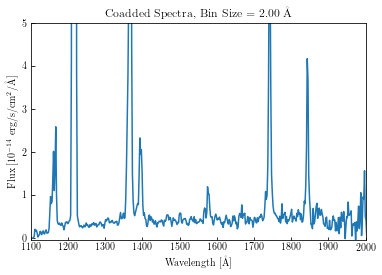

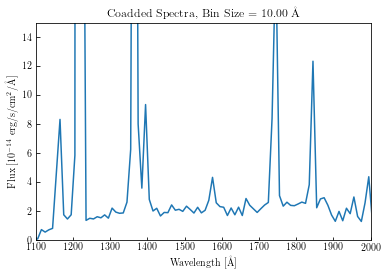

In [7]:
# Plots of coadded spectra for different wavelength bin widths
ybounds = [(-0.05,1), (-0.05, 2), (-0.05, 3), (-0.05, 5), (-0.05, 15)]
for iw in range(len(wavebin_a)):
    plt.plot(wave_cen[iw], comb_data[iw]['FLUX']*1e14)
    plt.xlabel(r"Wavelength [$\textup{\AA}$]")
    plt.ylabel(r"Flux [$10^{-14}$ erg/s/cm$^2$/$\textup{\AA}$]")
    #plt.ylim(-2, 18)
    plt.title(r"Coadded Spectra, Bin Size = %1.2f $\textup{\AA}$" % wavebin_a[iw])
    plt.ylim(ybounds[iw])
    plt.xlim(1100,2000)
    plt.show()